# 연습문제(2)

# 문제(1)

## #01. 작업준비

### 필요한 패키지 설치

In [2]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib import pyplot as plt
import seaborn as sb
from pandas import read_excel, DataFrame
import os, sys
import statsmodels.api as sm

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import ext_ols

### 데이터 가져오기

독립변수 : age, sex, bmi, bp, s1~s6

종속변수 : target

In [3]:
df = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220


## #02. 파이썬의 ols활용

In [4]:
model = ols("target ~ age + sex +bmi +bp+ s1+ s2+ s3+ s4+ s5+ s6", data=df)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                        17:24:19   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## #03. 모듈화 한 기능 사용

In [5]:
cls = list(df.columns)
cls.remove('target')
cls

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [6]:
model, fit, summary, table, result, goodness, varstr = ext_ols(df, x=cls, y='target')

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


In [7]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           3.83e-62
Time:                        17:24:19   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 분석결과 표 확인

In [8]:
table

B     표준오차  β        t   유의확률        VIF
종속변수   독립변수                                                  
target age    -10.0099   59.749  0  -0.168*  0.867   1.217315
       sex   -239.8156   61.222  0  -3.917*  0.000   1.283075
       bmi    519.8459   66.533  0   7.813*  0.000   1.532949
       bp     324.3846   65.422  0   4.958*  0.000   1.468583
       s1    -792.1756  416.680  0  -1.901*  0.058  59.257108
       s2     476.7390  339.030  0   1.406*  0.160  39.213144
       s3     101.0433  212.531  0   0.475*  0.635  15.403044
       s4     177.0632  161.476  0   1.097*  0.273   8.893714
       s5     751.2737  171.900  0   4.370*  0.000  10.125073
       s6      67.6267   65.984  0   1.025*  0.306   1.485021

In [9]:
result

'𝑅(0.518), 𝑅^2(0.507), 𝐹(46.27), 유의확률(3.83e-62), Durbin-Watson(2.029)'

In [10]:
goodness

'target에 대하여 age,sex,bmi,bp,s1,s2,s3,s4,s5,s6로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(10,431) = 46.27, p < 0.05).'

In [11]:
varstr

['age의 회귀계수는 -10.0099(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
 'sex의 회귀계수는 -239.8156(p<0.05)로, target에 대하여 유의미한 예측변인인 것으로 나타났다.',
 'bmi의 회귀계수는 519.8459(p<0.05)로, target에 대하여 유의미한 예측변인인 것으로 나타났다.',
 'bp의 회귀계수는 324.3846(p<0.05)로, target에 대하여 유의미한 예측변인인 것으로 나타났다.',
 's1의 회귀계수는 -792.1756(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
 's2의 회귀계수는 476.7390(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
 's3의 회귀계수는 101.0433(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
 's4의 회귀계수는 177.0632(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',
 's5의 회귀계수는 751.2737(p<0.05)로, target에 대하여 유의미한 예측변인인 것으로 나타났다.',
 's6의 회귀계수는 67.6267(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.']

## #04. 적절하지 않은 변수 추리기

### VIF가 10이상인 값을 제외하고 분석

In [12]:
model2, fit2, summmary2, table2, result2, goodness2, varstr2 = ext_ols(df, x='age,sex,bmi,bp,s4,s6'.split(','), y='target')

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


In [13]:
table2

B    표준오차  β        t   유의확률       VIF
종속변수   독립변수                                                
target age    -13.3215  62.658  0  -0.213*  0.832  1.217315
       sex   -222.9869  62.680  0  -3.558*  0.000  1.283075
       bmi    619.0558  68.629  0   9.020*  0.000  1.532949
       bp     384.6380  68.183  0   5.641*  0.000  1.468583
       s4     365.6936  69.494  0   5.262*  0.000  8.893714
       s6     126.2927  68.994  0   1.830*  0.068  1.485021

In [14]:
goodness2

'target에 대하여 age,sex,bmi,bp,s4,s6로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(6,435) = 59.01, p < 0.05).'

## #05. 회귀모델 구현 & 분석결과 보고

### 결과비교하기

In [15]:
실제_당뇨진행률 = df['target']
실제_당뇨진행률

0      151
1       75
2      141
3      206
4      135
      ... 
437    178
438    104
439    132
440    220
441     57
Name: target, Length: 442, dtype: int64

In [16]:
예측_당뇨진행률1 = fit.predict(df.filter(cls))
예측_당뇨진행률1

0      206.116677
1       68.071033
2      176.882790
3      166.914458
4      128.462258
          ...    
437    193.017565
438    101.055814
439    121.226681
440    211.858945
441     53.447275
Length: 442, dtype: float64

In [17]:
예측_당뇨진행률2 = fit2.predict(df.filter(['age', 'sex', 'bmi', 'bp', 's4', 's6']))
예측_당뇨진행률2 

0      183.755048
1       94.033998
2      160.810108
3      153.361342
4      141.066695
          ...    
437    175.390323
438    123.206218
439    134.986353
440    193.780711
441     72.113861
Length: 442, dtype: float64

In [18]:
result_df = DataFrame({
    "실제_당뇨진행률":실제_당뇨진행률,
    "예측_당뇨진행률1":예측_당뇨진행률1,
    "예측_당뇨진행률2":예측_당뇨진행률2
})

result_df

,실제_당뇨진행률,예측_당뇨진행률1,예측_당뇨진행률2
0,151,206.116677,183.755048
1,75,68.071033,94.033998
2,141,176.882790,160.810108
3,206,166.914458,153.361342
4,135,128.462258,141.066695
...,...,...,...
437,178,193.017565,175.390323
438,104,101.055814,123.206218
439,132,121.226681,134.986353
440,220,211.858945,193.780711


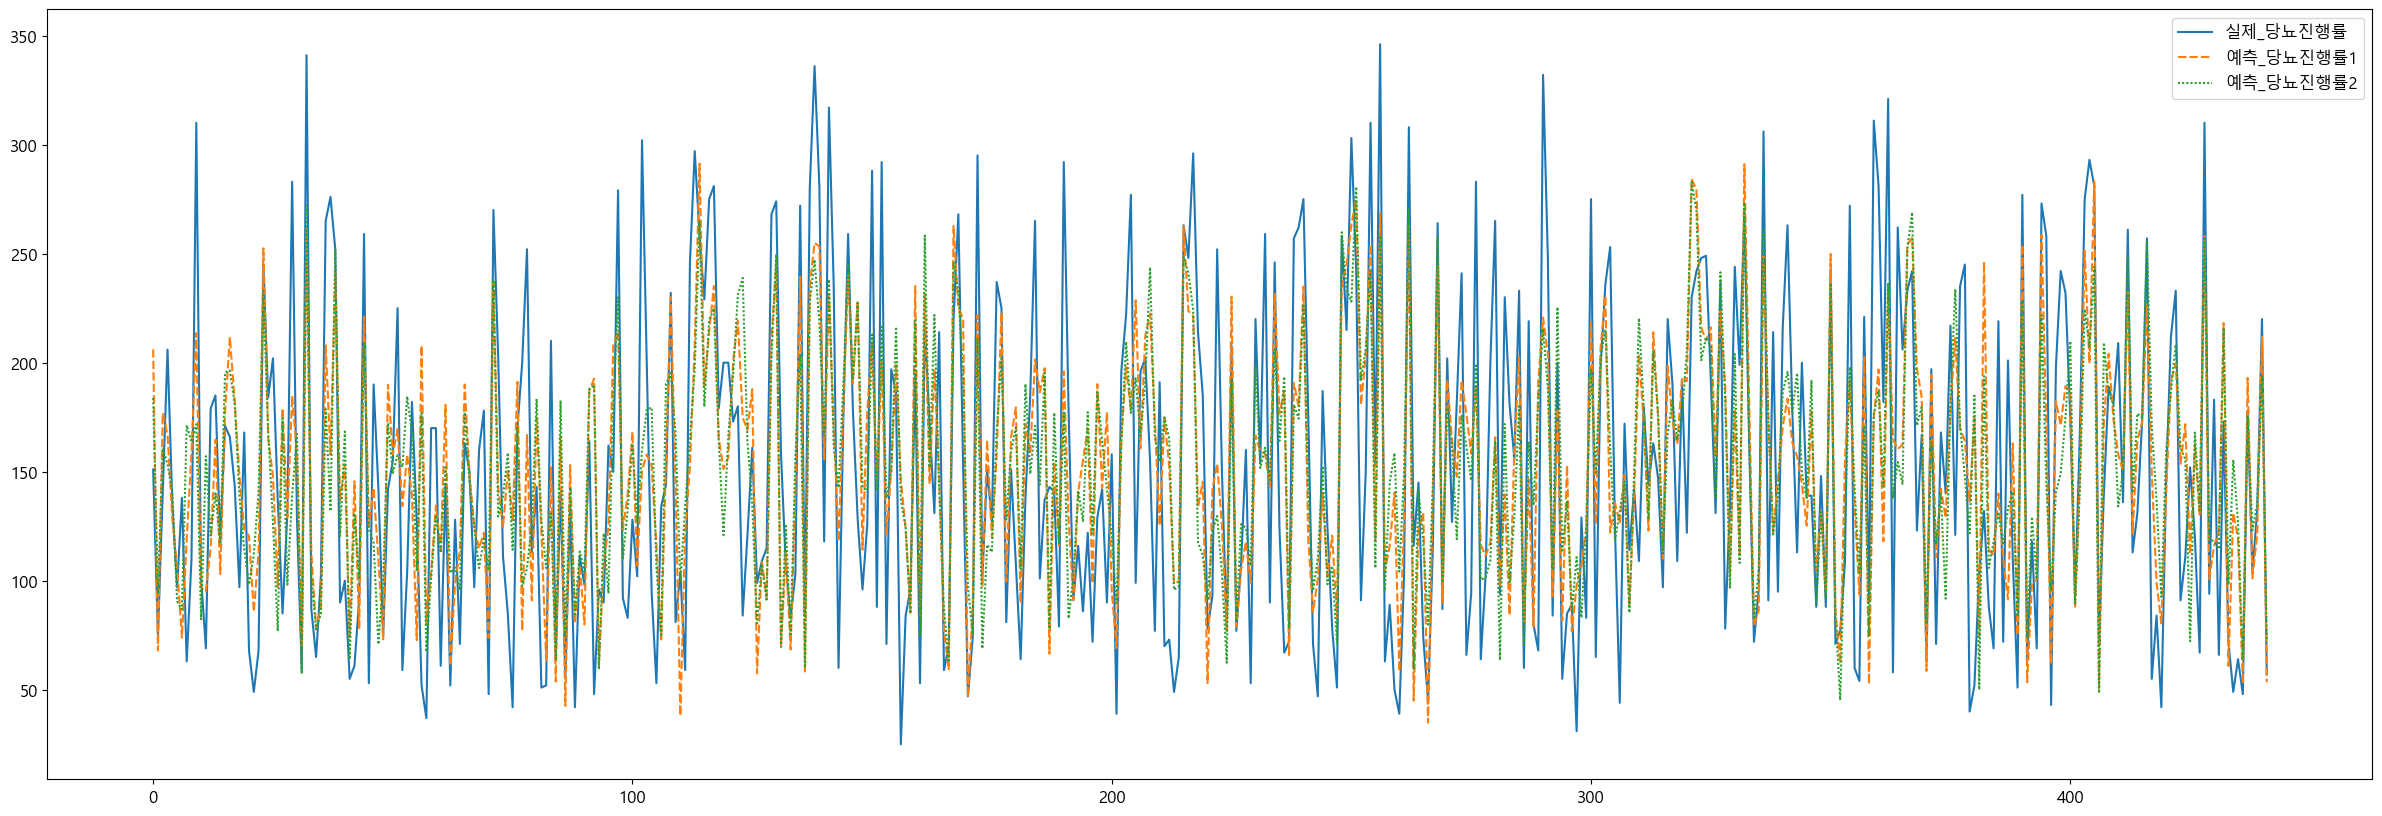

In [19]:
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

plt.figure()
sb.lineplot(data=result_df)
plt.show()
plt.close()

### 회귀분석 결과보고

#### 모형적합도 보고
'target에 대하여 age,sex,bmi,bp,s4,s6로 예측하는 회귀분석을 실시한 결과, 이 회귀모형은 통계적으로 유의하다(F(6,435) = 59.01, p < 0.05).'


#### 독립변수 보고
'age의 회귀계수는 -10.0099(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',


 'sex의 회귀계수는 -239.8156(p<0.05)로, target에 대하여 유의미한 예측변인인 것으로 나타났다.',


 'bmi의 회귀계수는 519.8459(p<0.05)로, target에 대하여 유의미한 예측변인인 것으로 나타났다.',


 'bp의 회귀계수는 324.3846(p<0.05)로, target에 대하여 유의미한 예측변인인 것으로 나타났다.',


 's1의 회귀계수는 -792.1756(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',


 's2의 회귀계수는 476.7390(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',


 's3의 회귀계수는 101.0433(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',


 's4의 회귀계수는 177.0632(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.',


 's5의 회귀계수는 751.2737(p<0.05)로, target에 대하여 유의미한 예측변인인 것으로 나타났다.',


 's6의 회귀계수는 67.6267(p>0.05)로, target에 대하여 유의하지 않은 예측변인인 것으로 나타났다.']
 

*************

# 문제(2)

## #01. 작업준비

### 필요한 패키지 설치

In [20]:
# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler 

### 데이터 가져오기

In [33]:
df2 = read_excel("https://data.hossam.kr/E04/manhattan.xlsx")
df2

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan


In [22]:
df2.dtypes

rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
borough              object
dtype: object

In [23]:
list(set(df2['borough']))

['Manhattan']

In [24]:
df2['borough'] = 1

In [25]:
neighborhood_dict = {}

for a, b in enumerate(list(set(df2['neighborhood']))):
    neighborhood_dict[b] = a+1

neighborhood_dict

{'Soho': 1,
 'Battery Park City': 2,
 'Inwood': 3,
 'Midtown East': 4,
 'Nolita': 5,
 'Morningside Heights': 6,
 'Little Italy': 7,
 'Flatiron': 8,
 'Midtown South': 9,
 'Long Island City': 10,
 'East Village': 11,
 'Midtown': 12,
 'West Village': 13,
 'Stuyvesant Town/PCV': 14,
 'Manhattanville': 15,
 'Central Park South': 16,
 'Midtown West': 17,
 'Roosevelt Island': 18,
 'Financial District': 19,
 'East Harlem': 20,
 'Gramercy Park': 21,
 'Chinatown': 22,
 'Upper West Side': 23,
 'Tribeca': 24,
 'Central Harlem': 25,
 'West Harlem': 26,
 'Upper East Side': 27,
 'Washington Heights': 28,
 'Hamilton Heights': 29,
 'Chelsea': 30,
 'Lower East Side': 31,
 'Greenwich Village': 32}

In [31]:
# dictionary key값으로 대체.
df2['neighborhood']=df2['neighborhood'].apply(lambda x : neighborhood_dict[x])

In [48]:
# tip : transform 함수를 이용해서 새로운 칼럼 생성.
import numpy as np
df2["test"]=df2.groupby("neighborhood")["rent"].transform(np.mean)
df2

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough,test
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan,5519.004000
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan,5471.424242
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan,5930.672269
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan,5471.424242
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan,8467.655172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea,Manhattan,6193.483516
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,Manhattan,7975.260504
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,Manhattan,2248.000000
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,Manhattan,4125.996815


## #02. 데이터 전처리

In [27]:
# 독립변수 컬럼만 추출
x_train = df2.drop('rent', axis=1)
x_train
#추출된 독립변수 표준화
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_train_std

ValueError: could not convert string to float: 'Upper East Side'